In [4]:
%%HTML
<style> code {background-color : pink !important;} </style>

In [5]:
# Code for running the advanced lane finding project 

#Author - Srikant Rao 

## Import statements 

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import glob
import pickle
import helper as hlp
from Line import Line

#Import the module for editing the movie
from moviepy.editor import VideoFileClip


%matplotlib inline

In [6]:
# Get the camera and distortion matrices from the pickle file 
matrices = pickle.load( open( "matrices.pickle", "rb" ) )
dist = matrices[0]
mtx = matrices[1]

### Test the distortion and Camera Matrix on the test images provided 

The below code block plots the undistorted image based on the distortion coefficients and camera matrix 
calculated from the chessboard images. 
The image is then thresholded using a combination of Gradient Threshold ( Sobel_x + Magnitude + Direction) and Color thresholding (HSV thresholding for Yellow and White Color). 

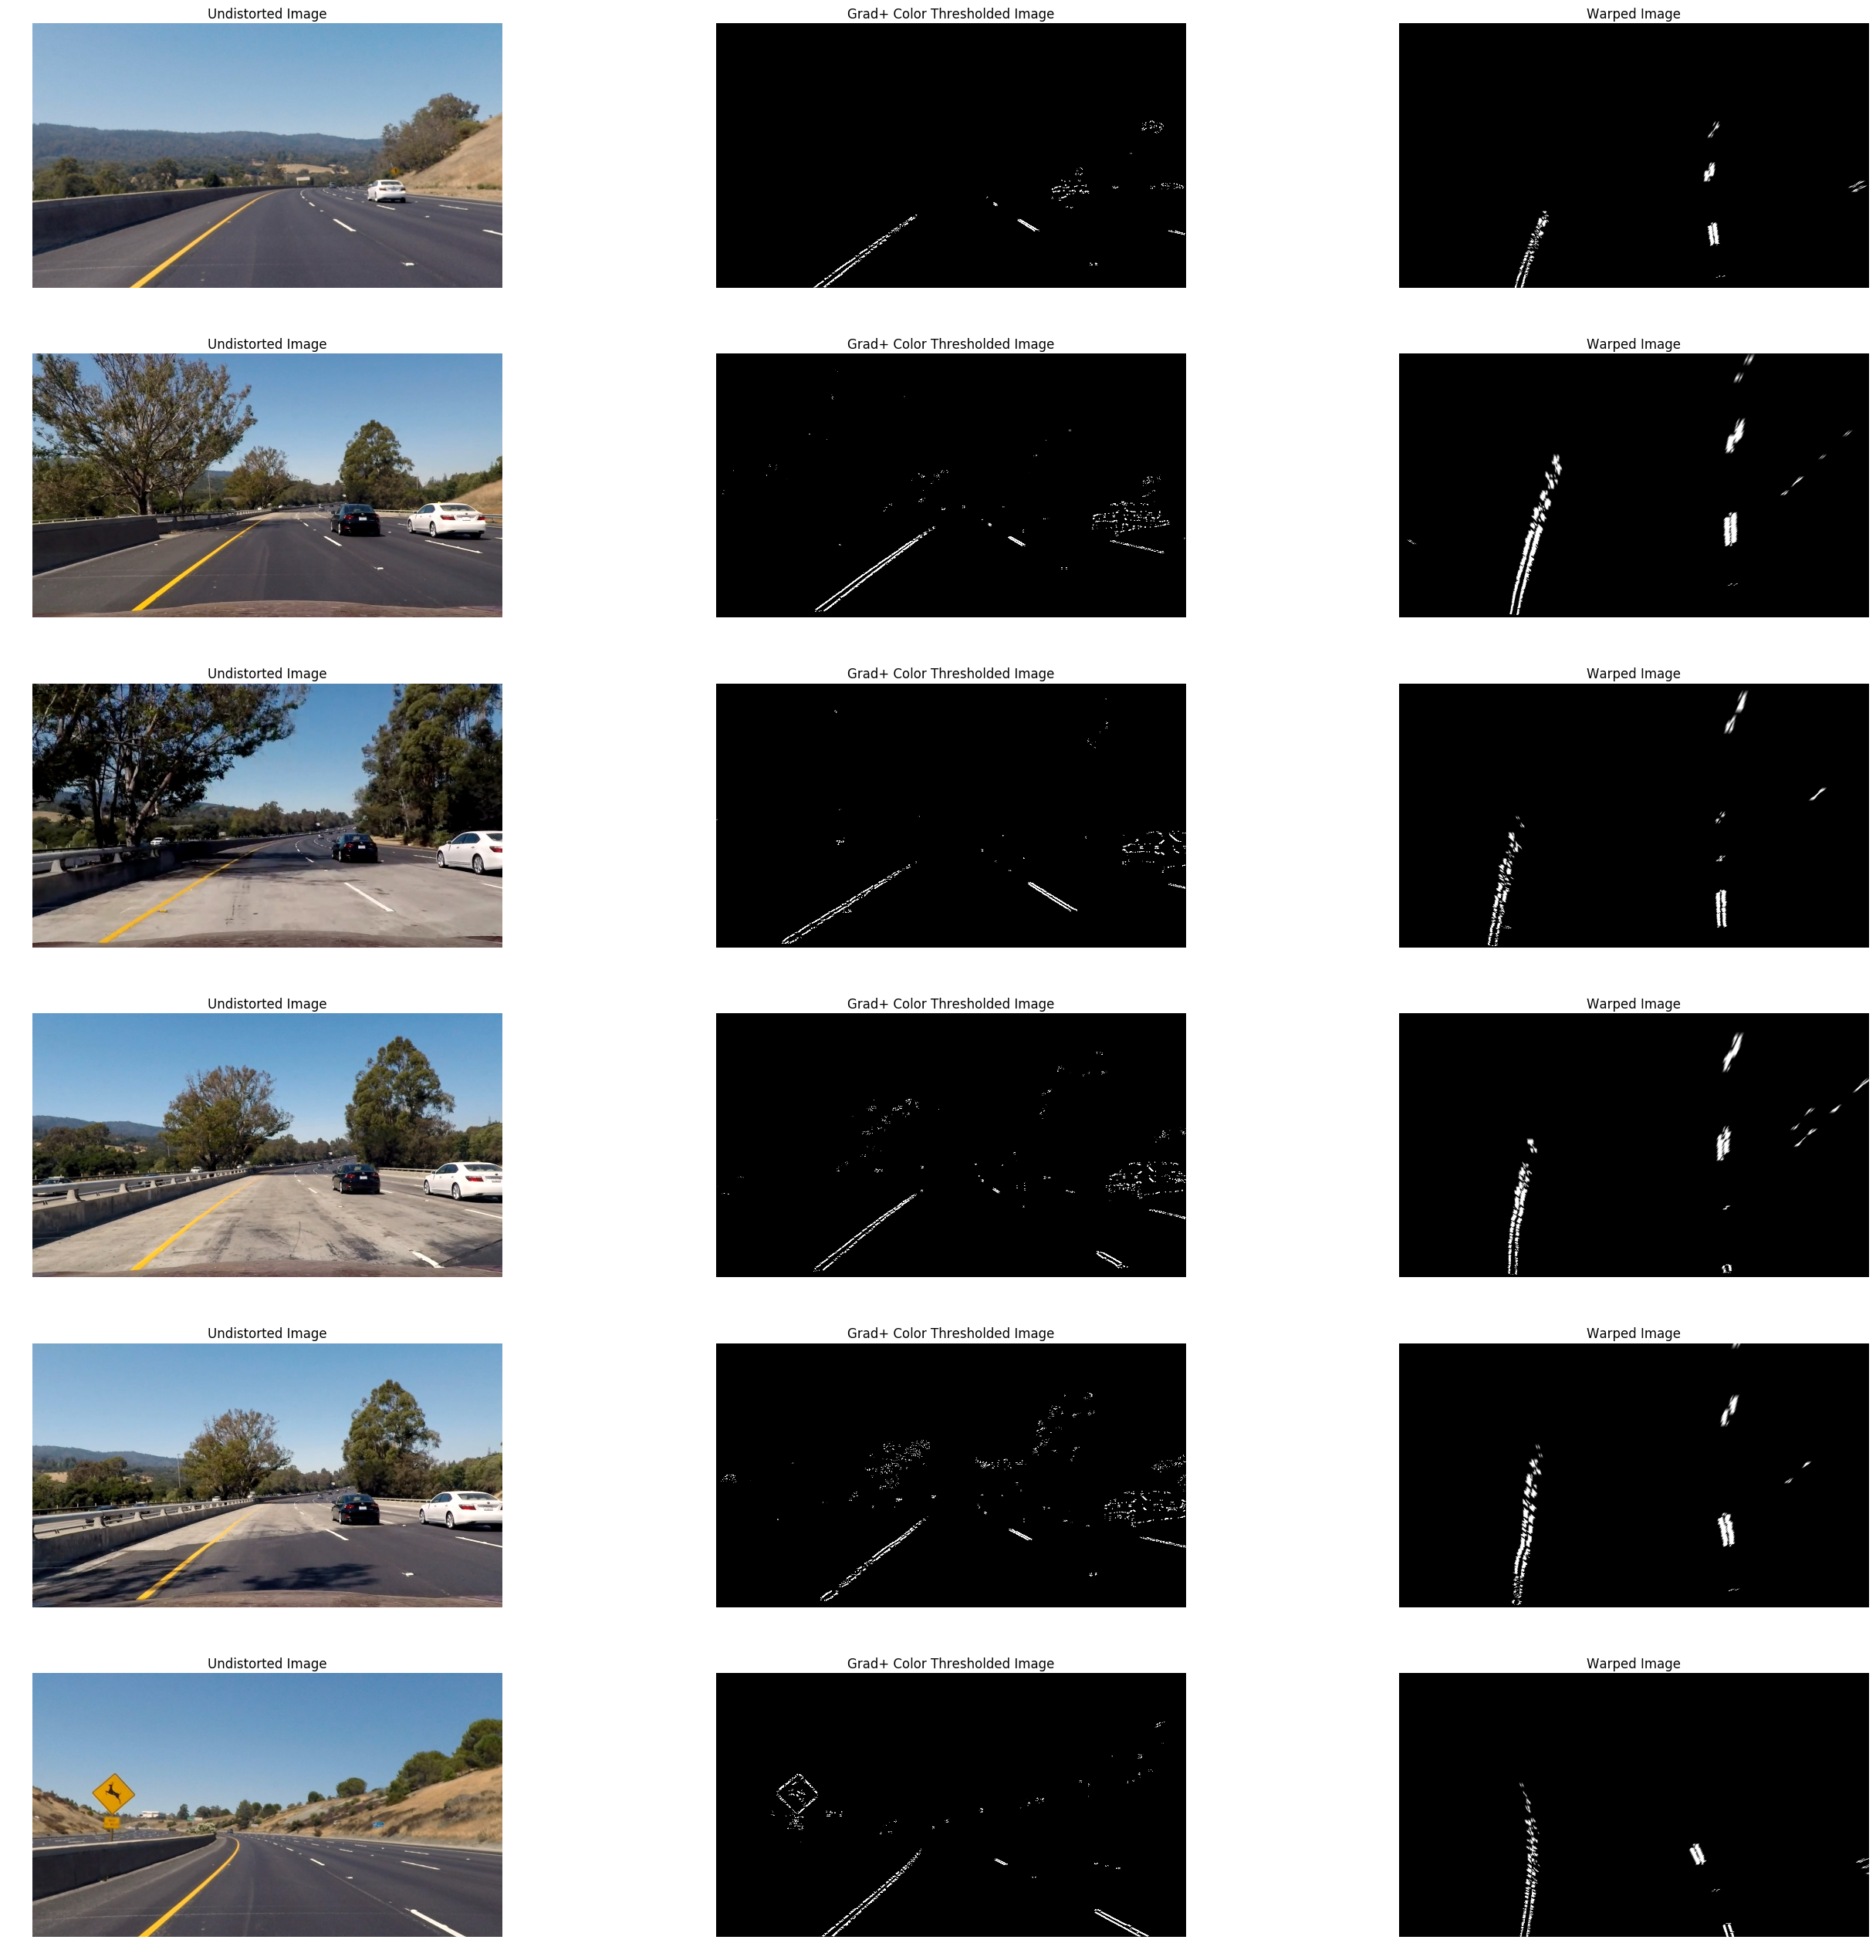

In [7]:
import matplotlib.gridspec as gridspec

# Create a pipepline for transforming the image

def image_transform(image):
    """Image Transform performs -
        1. Distortion removal of the image
        2. Color and gradient threshold on the image
        3. Perspective transform on the image """

    # Step 1: Undistort the image
    undist_img = hlp.undistort_image(image, dist, mtx)

    # Step2 : Use a combined threshold function ( color + gradient )
    comb_binary_img = hlp.combined_threshold(undist_img, ksize=7)

    # Step3 : Perform a perspective transform -- Images points are already selected in the src and dst in the function
    warped_img = hlp.warp(comb_binary_img)

    return undist_img,comb_binary_img,warped_img


fpath = glob.glob('test_images/test*.jpg')

plt.figure(figsize = (32,32))
gs1 = gridspec.GridSpec(len(fpath),3)
gs1.update(wspace=0.25, hspace=0.25)
i=0

# Test the function

for fname in fpath:
    fimg = mpimg.imread(fname)

    undist_img,comb_img,warped_img = image_transform(fimg)

    ax1 = plt.subplot(gs1[i])
    plt.axis('off')
    ax1.imshow(undist_img)
    ax1.set_title("Undistorted Image")
    ax2 = plt.subplot(gs1[i+1])
    plt.axis('off')
    ax2.imshow(comb_img,cmap='gray')
    ax2.set_title("Grad+ Color Thresholded Image")
    ax3 = plt.subplot(gs1[i+2])
    plt.axis('off')
    ax3.imshow(warped_img,cmap='gray')
    ax3.set_title("Warped Image")
    i +=3

### Create a function which includes the pipeline to 
1. Locate the lane lines in a warped image
2. Fit the left and right lane lines 
3. Draw the lanes on the warped image and then "un-warp" the image

In [8]:
# Create a function that you can call using the fl_image function to process images of the video

# Create a pipepline for transforming the image

def process_image(image):
    """Process Image performs
        1. Image transformation ( distortion removal, thresholding and perspective transform
        2. Locates lines
        3. Fit lines to a second degree polynomial
        4. Draws lines on warped or unwarped images if needed """

    # Step 1 : Image tranformation
    undist_img, comb_img, warped_img = image_transform(image)

    # Step 2 : Locate the lane lines
    lines.find_lanes(warped_img)

    # Step3 : Fit the lane lines using the left and right lane images
    lines.fit_lines()

    # Step 4 : Draw the lines and unwarp the image
    final_image = lines.draw_lines(image)

    return final_image

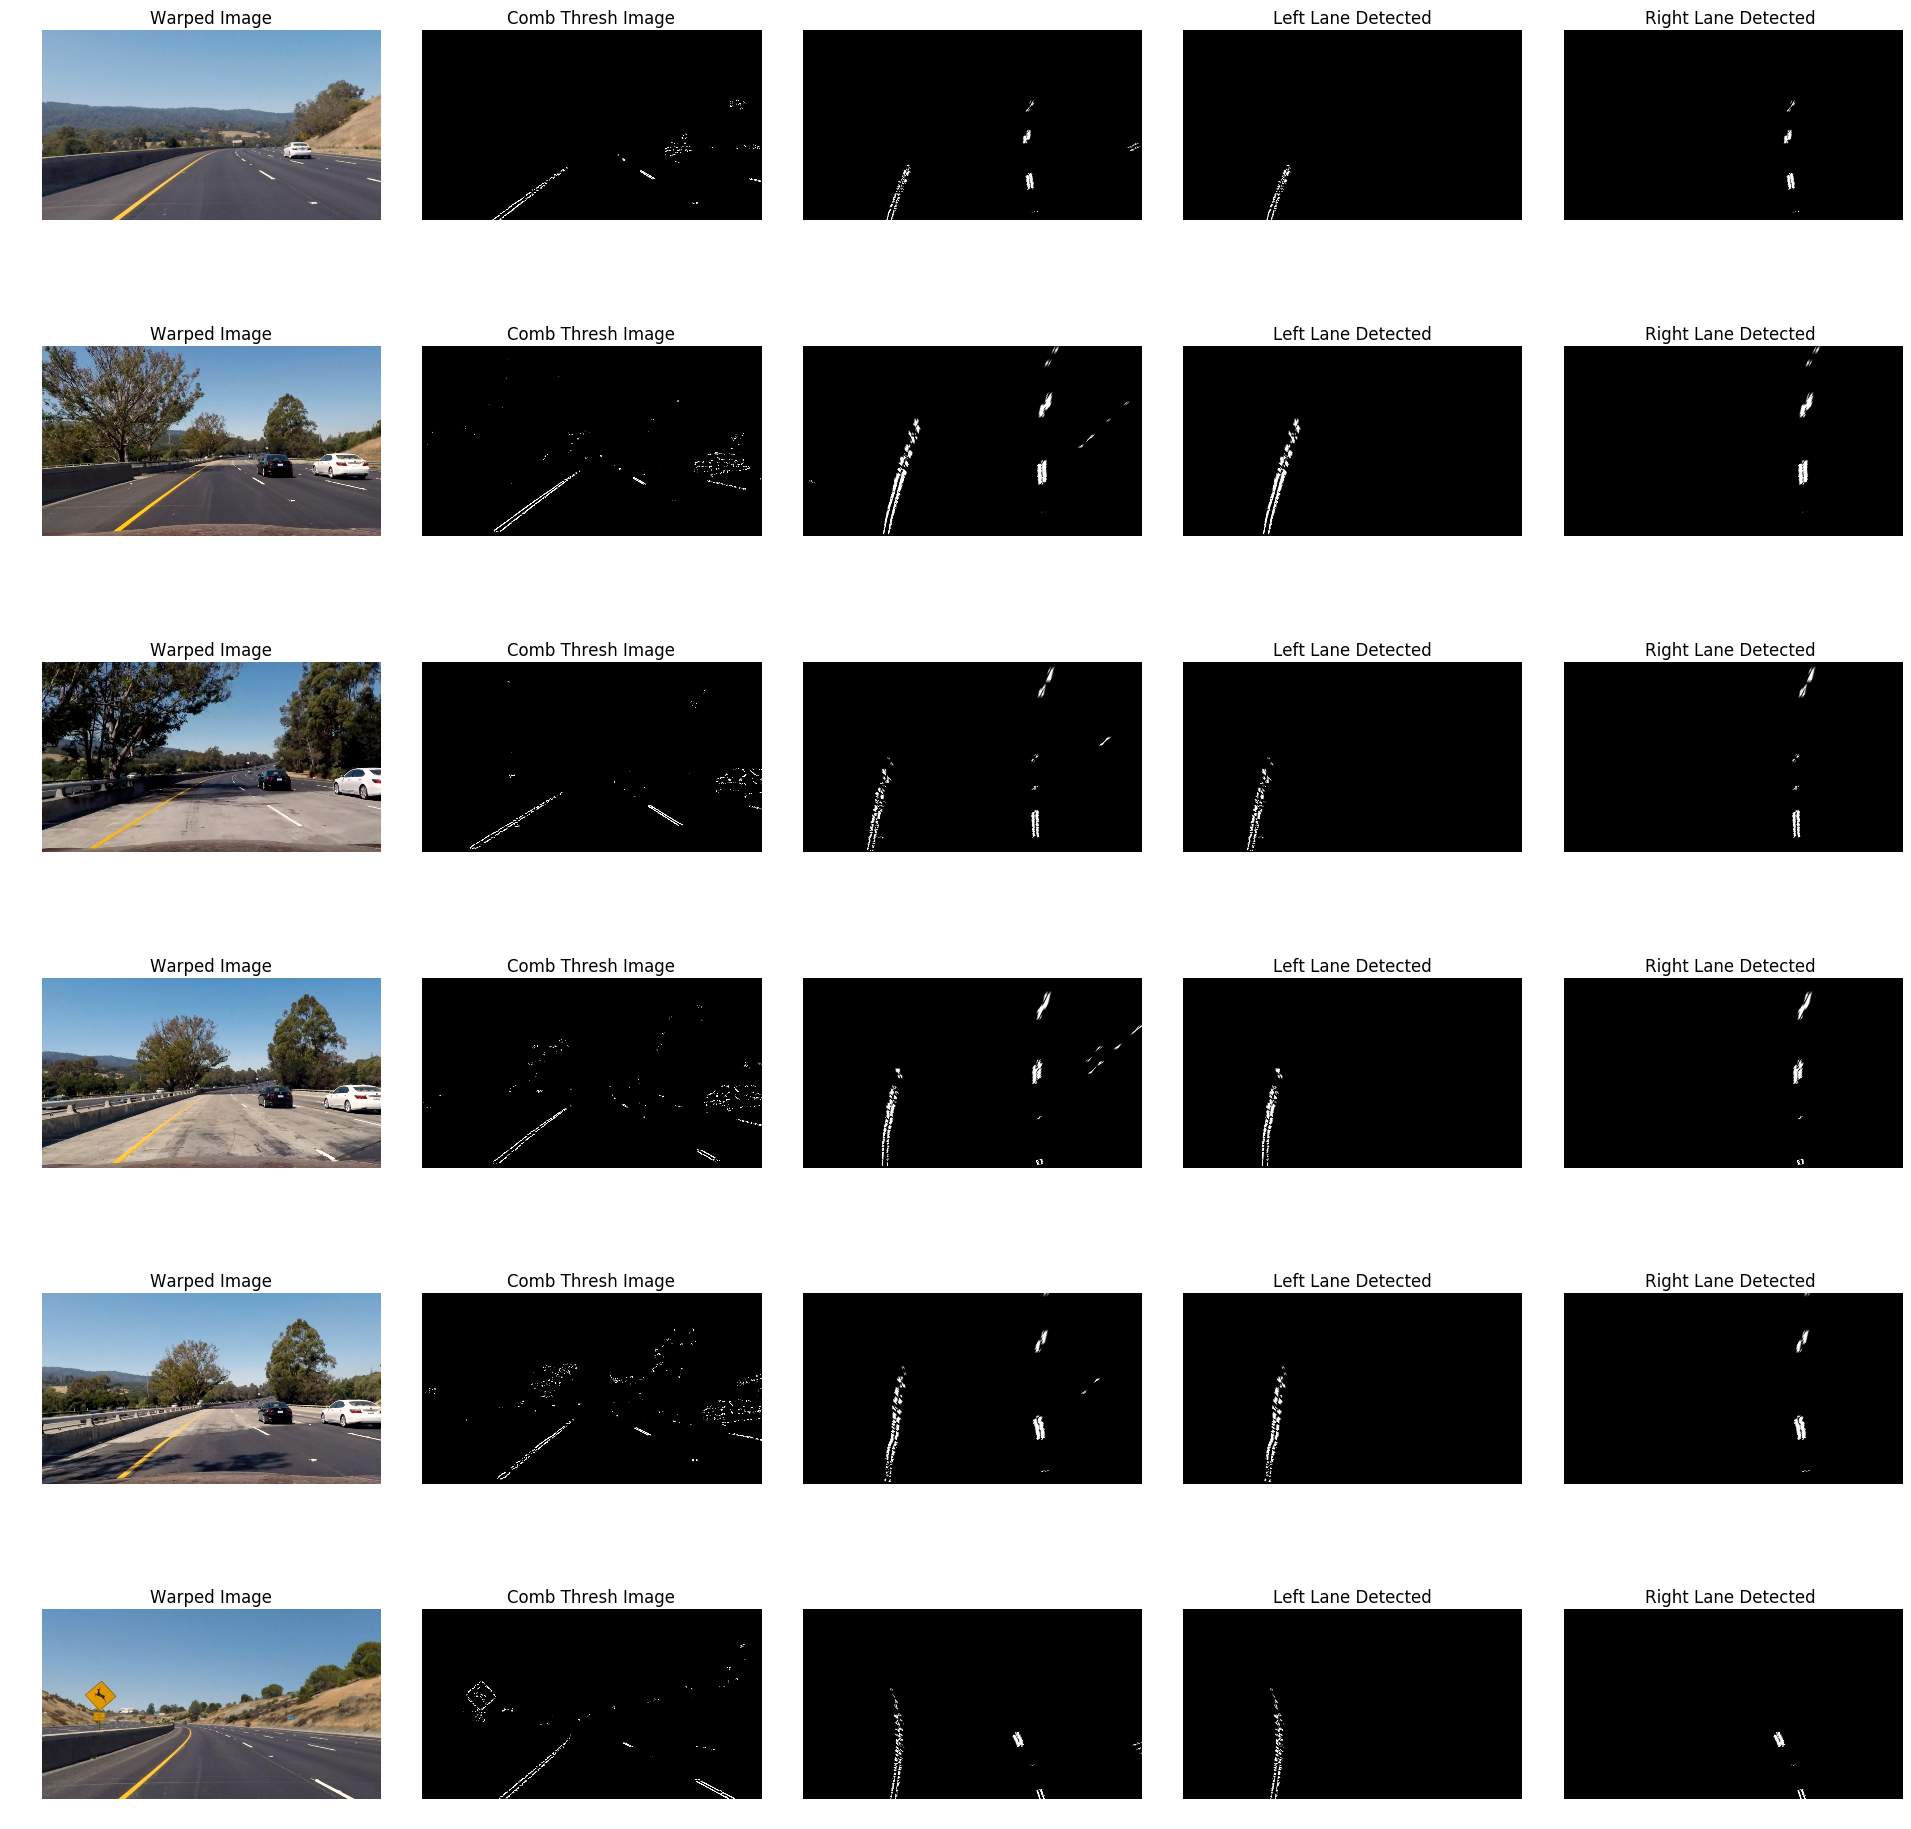

In [10]:

from Line import Line 

fpath = glob.glob('test_images/test*.jpg')

plt.figure(figsize = (24,24))
gs1 = gridspec.GridSpec(len(fpath),5)
gs1.update(wspace=0.125, hspace=0.125)
i=0


# Test the function

for fname in fpath:
    fimg = mpimg.imread(fname)

    undist_img,comb_img,warped_img = image_transform(fimg)

    #Initialize the class
    lines = Line()

    lines.find_lanes(warped_img)

    ax1 = plt.subplot(gs1[i])
    plt.axis('off')
    ax1.imshow(undist_img,cmap='gray')
    ax1.set_title("Undistorted Image")
    ax2 = plt.subplot(gs1[i+1])
    plt.axis('off')
    ax2.imshow(comb_img,cmap='gray')
    ax2.set_title("Comb Thresh Image")
    ax3 = plt.subplot(gs1[i+2])
    plt.axis('off')
    ax3.imshow(warped_img,cmap='gray')
    ax1.set_title("Warped Image")
    ax4 = plt.subplot(gs1[i + 3])
    plt.axis('off')
    ax4.imshow(lines.left_lane_img,cmap='gray')
    ax4.set_title("Left Lane Detected")
    ax5 = plt.subplot(gs1[i + 4])
    plt.axis('off')
    ax5.imshow(lines.right_lane_img, cmap='gray')
    ax5.set_title("Right Lane Detected ")
    i +=5

In [11]:
# Running the code to create the video 

#Initialize the line class
lines = Line()
# Create a pipeline and run it on the project video
clip = VideoFileClip("./project_video.mp4")

output_video = "./project_video_output.mp4"

output_clip = clip.fl_image(process_image)
output_clip.write_videofile(output_video, audio=False)


[MoviePy] >>>> Building video ./project_video_output.mp4
[MoviePy] Writing video ./project_video_output.mp4


100%|█████████▉| 1260/1261 [06:36<00:00,  3.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./project_video_output.mp4 

